In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets("./data/mnist", one_hot=True, validation_size=0)

Extracting ./data/mnist/train-images-idx3-ubyte.gz
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


train data shape: (60000, 784)
test data shape: (10000, 784)
Example of label: [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


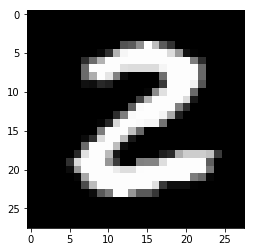

In [3]:
# Plot the first image
print("train data shape:",mnist.train.images.shape)
print("test data shape:",mnist.test.images.shape)
#print("Example of image:",mnist.train.images[1])
print("Example of label:",mnist.train.labels[1])

image = mnist.train.images[25]
image = image*255
pixels = image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [4]:
learning_rate = 0.06
epochs = 25
batch_size = 100
tf.set_random_seed(1)

In [5]:
# Input 
x = tf.placeholder("float", [None, 784],name="Pixles")
y = tf.placeholder("float", [None, 10],name="TrueLabels")

<h1>Softmax </h1><img src="https://jamesmccaffrey.files.wordpress.com/2016/03/softmaxequation.jpg" />

In [ ]:
# Simple NN without any hidden layer (accuracy = 91.3)
with tf.name_scope("simple_NN") as scope:
    W = tf.Variable(initial_value=tf.random_normal([784,10],stddev=0.05 )  ,name="W" )
    B = tf.Variable(initial_value=tf.zeros([10]), name="B")
    y_pred = tf.nn.softmax(tf.matmul(x, W) + B)
    

In [6]:
# Simple NN without one hidden layer (accuracy = 94.04)

with tf.name_scope("Hidden_Layer1") as scope:
    W1 = tf.Variable(initial_value=tf.random_normal([784,300],stddev=0.008) ,name="W1" )
    B1 = tf.Variable(initial_value=tf.zeros([300]),name="B1")
    Y1 = tf.nn.relu(tf.matmul(x, W1) + B1)

with tf.name_scope("Output_Layer") as scope:
    W2=tf.Variable(initial_value=tf.random_normal([300,10],stddev=0.05 )  ,name="W2" )
    B2 = tf.Variable(initial_value=tf.zeros([10]), name="B2")
    y_pred = tf.nn.softmax(tf.matmul(Y1, W2) + B2)

In [7]:
with tf.name_scope("Cost") as scope:
    cost_function = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred, labels=y))
    tf.summary.scalar("cost_function", cost_function)

In [8]:
with tf.name_scope("optimizer_GD") as scope:
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)

In [9]:
init = tf.global_variables_initializer()

In [10]:
# Launch graph 
with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            _, cost = sess.run([optimizer, cost_function], feed_dict={x: batch_xs, y: batch_ys})
            
            avg_cost += cost
            
            
        print("Iteration:", '%02d' % (iteration + 1), "cost=", "{:.9f}".format(avg_cost))

    print("Tuning Completed!")

    predictions = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(predictions, "float"))
   
    
    print("Test Accuracy: ", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
    print("Train Accuracy: ", accuracy.eval({x: mnist.train.images, y: mnist.train.labels}))

Iteration: 01 cost= 1202.084699154
Iteration: 02 cost= 1015.987375021
Iteration: 03 cost= 994.385144353
Iteration: 04 cost= 986.340995431
Iteration: 05 cost= 981.706268072
Iteration: 06 cost= 978.591709971
Iteration: 07 cost= 975.199118257
Iteration: 08 cost= 950.837206125
Iteration: 09 cost= 940.970649481
Iteration: 10 cost= 936.671680570
Iteration: 11 cost= 933.781119585
Iteration: 12 cost= 931.491567612
Iteration: 13 cost= 929.619370461
Iteration: 14 cost= 927.889273405
Iteration: 15 cost= 926.418087244
Iteration: 16 cost= 925.053984880
Iteration: 17 cost= 923.783489108
Iteration: 18 cost= 922.616057038
Iteration: 19 cost= 921.554566145
Iteration: 20 cost= 920.534849882
Iteration: 21 cost= 919.608851194
Iteration: 22 cost= 918.752946138
Iteration: 23 cost= 917.881106377
Iteration: 24 cost= 917.054684043
Iteration: 25 cost= 916.313510537
Tuning Completed!
Test Accuracy:  0.9405
Train Accuracy:  0.9426
